1. **Statement of the business task**

The annual members are much more profitable than casual riders, so the business task is to identify the bike usage difference between casual riders and annual members to help design a strategy to increase membership enrollment.

2. **Description of data sources used**

The data is located at AWS cloud storage. I downloaded all of the data recorded from Jan 2021 to Dec 2021 and stored them on my desktop. A folder is created to store all data related to this project. This report and codes will be public available on kaggle and the link to download the data is: https://divvy-tripdata.s3.amazonaws.com/index.html

3. **Data cleaning/manipulation documentation**

Due to the high amount of data that needs to be analyzed, I choose to use the R language to perform the analyzing task. First, 12 individual monthly records are combined into one single table for batch analysis. And the time was in YYYY-MM-DD hh:mm:ss format, now 3 columns were created to hold the month, date and time information separately to calculate the usage length, results are also filled into another column. In addition, a “day of week” column is also determined for a finer usage investigation.

I filtered out the items related to bikes that were taken out of docks and checked for quality by Divvy or ride_length was negative. The items with “N/A” were also filtered out for the proper computational functions.

4. **Analysis Summary**

The range of ride duration is from 1 ~ 3,356,649 seconds(rounded to the nearest integer), however, further consultation with domain experts or investigation is needed to determine if the extremities are due to usage error  and should be included in the analysis. The average ride duration is 1309 seconds(21 mins) and the median ride duration is 732 seconds(5 mins).

5. **Supporting visualizations and key findings**

The usage pattern is different between casual riders and members. The casual members use cyclistic bikes significantly more frequently during weekends than weekdays while the members' usages show the weekdays slightly more frequent than the weekends and the distribution is more even than the casual riders. The mode of weekday rides for casual riders is Saturday while for members is Wednesday.
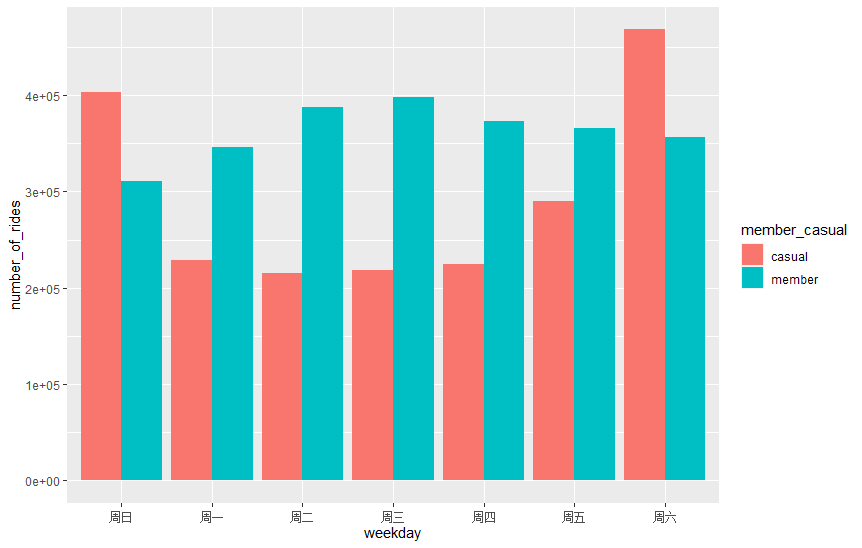

The drastic usage difference between casual riders and members is also underlined by the average duration of rides: The casual riders has around two fold average duration than the members. Interestingly, even among members, the average ride duration of weekends are higher than weekdays. The data above implies the purpose of rides: during weekends, people use cyclistic bikes for entertainment or exercise, for example a ride into parks. during weekdays, for transportation between home and workplace. And casual riders do not tend to use cyclistic bikes for work commuting.
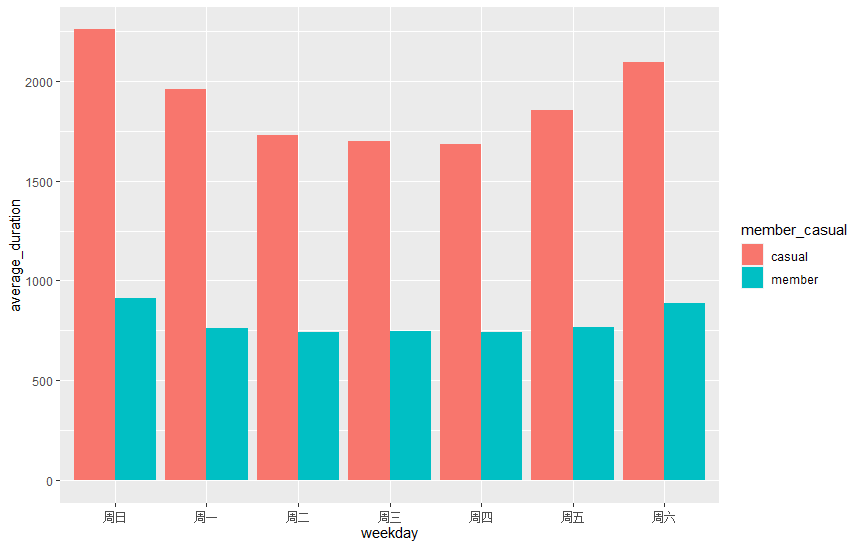

6. **Top three recommendations based on analysis**

a. The reason causing the difference usage pattern between casual riders and annual members could due to following reasons:
Those casual riders who do not use cyclistic bikes for work commuting on weekdays may due to there is no close stations near their home or workplace. So setting more stations may help encouraging people to ride to work during weekdays.

b. Alternatively, casual riders may just not think of using cyclistic bikes for work commuting. So I would recommend a promotion for new membership subscription at a discount rate to cultivate people’s habit of riding to work.

c. Furthermore, we can shape the usage of cyclistic bikes by changing the cost of each ride, for example, if a ride duration is below 1000 seconds, the unit charge is fairly cheap but above 1000 seconds, the unit charge will increase incrementally. so people will tend to ride shorter but more frequent. Even casual riders do not want to change their style, the increased rate for them can also raise the total revenue.


In [ ]:
library(tidyverse)
library(lubridate)
library(ggplot2)

getwd()
setwd("E:/Data Science/Projects/Cyclistic/unzipped")
jan <- read_csv("202101-divvy-tripdata.csv")
feb <- read_csv("202102-divvy-tripdata.csv")
mar <- read_csv("202103-divvy-tripdata.csv")
apr <- read_csv("202104-divvy-tripdata.csv")
may <- read_csv("202105-divvy-tripdata.csv")
jun <- read_csv("202106-divvy-tripdata.csv")
jul <- read_csv("202107-divvy-tripdata.csv")
aug <- read_csv("202108-divvy-tripdata.csv")
sep <- read_csv("202109-divvy-tripdata.csv")
oct <- read_csv("202110-divvy-tripdata.csv")
nov <- read_csv("202111-divvy-tripdata.csv")
dec <- read_csv("202112-divvy-tripdata.csv")

colnames(jan)
colnames(feb)
colnames(mar)
colnames(apr)
colnames(may)
colnames(jun)
colnames(jul)
colnames(aug)
colnames(sep)
colnames(oct)
colnames(nov)
colnames(dec)

str(jan)
str(feb)
str(mar)
str(apr)
str(may)
str(jun)
str(jul)
str(aug)
str(sep)
str(oct)
str(nov)
str(dec)

lastyear <- bind_rows(jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec)

colnames(lastyear)  #List of column names
nrow(lastyear)  #How many rows are in data frame?
dim(lastyear)  #Dimensions of the data frame?
head(lastyear)  #See the first 6 rows of data frame.  Also tail(all_trips)
str(lastyear)  #See list of columns and data types (numeric, character, etc)
summary(lastyear)  #Statistical summary of data. Mainly for numerics

table(lastyear$member_casual)

lastyear$date <- as.Date(lastyear$started_at) #The default format is yyyy-mm-dd
lastyear$month <- format(as.Date(lastyear$date), "%m")
lastyear$day <- format(as.Date(lastyear$date), "%d")
lastyear$day_of_week <- format(as.Date(lastyear$date), "%A")

lastyear$ride_length <- difftime(lastyear$ended_at,lastyear$started_at)

str(lastyear)

lastyear$ride_length <- as.numeric(lastyear$ride_length)

lastyear_2 <- lastyear[!(lastyear$start_station_name == "HQ QR" | lastyear$ride_length<=0),]
lastyear_2 <- na.omit(lastyear_2)

head(lastyear_2$ride_length)

sum(lastyear_2$ride_length)

mean(lastyear_2$ride_length) #straight average (total ride length / rides)
median(lastyear_2$ride_length) #midpoint number in the ascending array of ride lengths
max(lastyear_2$ride_length) #longest ride
min(lastyear_2$ride_length) #shortest ride

summary(lastyear_2$ride_length)


# Compare members and casual users
aggregate(lastyear_2$ride_length ~ lastyear_2$member_casual, FUN = mean)
aggregate(lastyear_2$ride_length ~ lastyear_2$member_casual, FUN = median)
aggregate(lastyear_2$ride_length ~ lastyear_2$member_casual, FUN = max)
aggregate(lastyear_2$ride_length ~ lastyear_2$member_casual, FUN = min)

# See the average ride time by each day for members vs casual users
aggregate(lastyear_2$ride_length ~ lastyear_2$member_casual + lastyear_2$day_of_week, FUN = mean)

# Notice that the days of the week are out of order
lastyear_2$day_of_week <- ordered(lastyear_2$day_of_week, levels=c("星期日", "星期一", "星期二", "星期三", "星期四", "星期五", "星期六"))

# Average ride time by each day for members vs casual users
aggregate(lastyear_2$ride_length ~ lastyear_2$member_casual + lastyear_2$day_of_week, FUN = mean)

# analyze ridership data by type and weekday
lastyear_2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  #creates weekday field using wday()
  group_by(member_casual, weekday, na.rm = TRUE) %>%  #groups by usertype and weekday
  summarise(number_of_rides = n()							#calculates the number of rides and average duration 
            ,average_duration = mean(ride_length)) %>% 		# calculates the average duration
  arrange(member_casual, weekday)								# sorts

# Visualize the number of rides by rider type
lastyear_2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")

#Visualization for average duration
lastyear_2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")

# Create a csv file that we will visualize in Excel, Tableau, or my presentation software

counts <- aggregate(lastyear_2$ride_length ~ lastyear_2$member_casual + lastyear_2$day_of_week, FUN = mean)
write.csv(counts, file = "E:/Data Science/Projects/Cyclistic/avg_ride_length.csv")